C:\Users\Tiago Almeida\anaconda3\lib\site-packages\skimage\metrics\simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


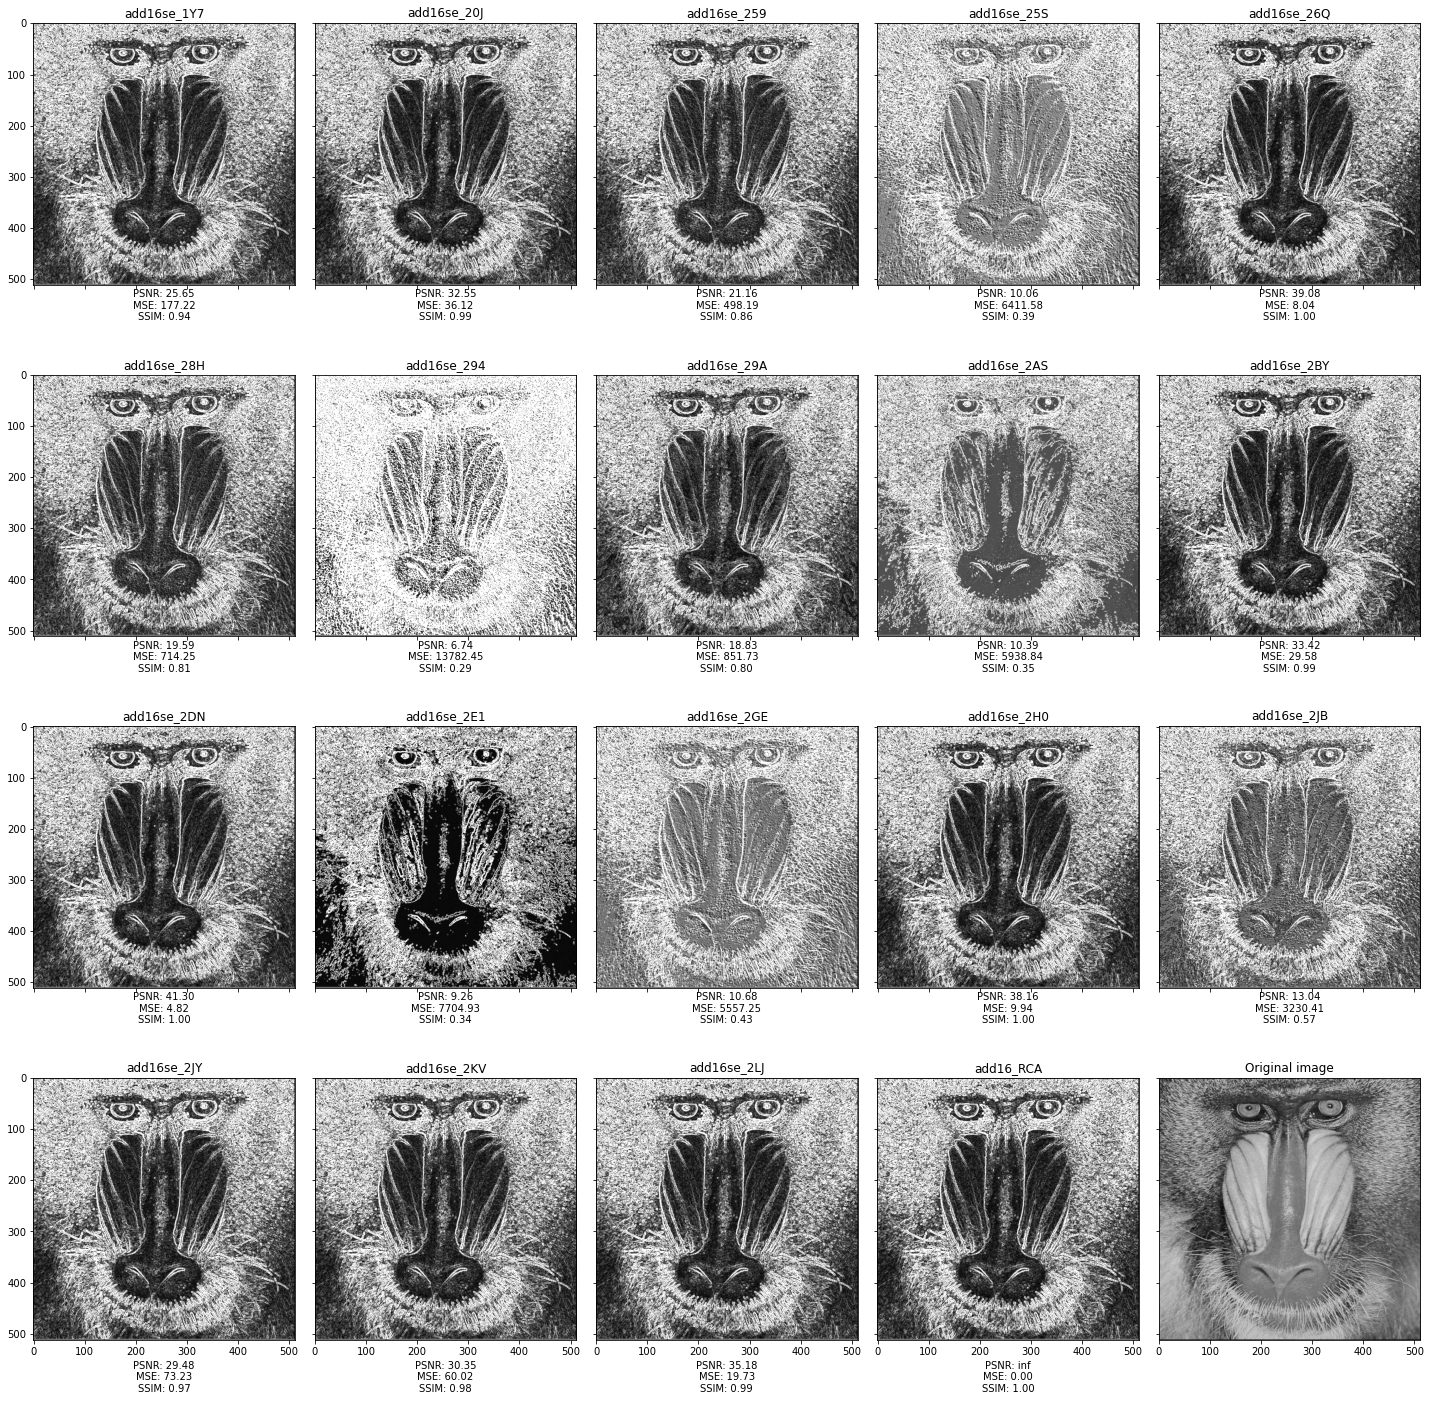

In [1]:
import math
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

case = 'Baboon'

golden = cv2.imread(case + "/output.pgm")
rca = cv2.imread(case + "/add16_RCA.pgm")
input = cv2.imread(case + "/input.pgm")
approx = glob.glob(case + "/add16se_*.pgm")

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 20),
                         sharex=True, sharey=True)
axx = axes.ravel()
i = 0
psnr_array = []
ssim_array = []
mse_array = []
adder_array = []
for appr in approx:
  ax = cv2.imread(appr, 1)
  psnr_value = psnr(golden, ax) 
  psnr_array.append("{:.2f}".format(psnr_value))
  score = ssim(golden, ax, multichannel=True, gaussian_weights=True, sigma=1.5,
               use_sample_covariance=False, data_range=1.0)
  ssim_array.append("{:.2f}".format(score))
  mse_noise = mse(golden, ax)
  mse_array.append("{:.2f}".format(mse_noise))
  
  axx[i].imshow(ax, vmin=0, vmax=1)
  axx[i].set_xlabel(f'PSNR: {psnr_value:.2f}\nMSE: {mse_noise:.2f}\nSSIM: {score:.2f}')
  head, tail = os.path.split(appr)
  head = tail.split('.')
  axx[i].set_title(head[0])
  adder_array.append("{}".format(head[0]))

  i = i + 1
  

psnr_value = psnr(golden, rca)
ssim_none = ssim(golden, rca, multichannel=True, gaussian_weights=True, sigma=1.5,
             use_sample_covariance=False, data_range=1.0)
mse_none = mse(golden, rca)
axx[i].imshow(golden, vmin=0, vmax=1)
axx[i].set_xlabel(f'PSNR: {psnr_value:.2f}\nMSE: {mse_none:.2f}\nSSIM: {ssim_none:.2f}')
axx[i].set_title('add16_RCA')

axx[i+1].imshow(input, vmin=0, vmax=1)
axx[i].set_xlabel(f'PSNR: {psnr_value:.2f}\nMSE: {mse_none:.2f}\nSSIM: {ssim_none:.2f}')
axx[i+1].set_title('Original image')

plt.tight_layout()
plt.savefig(case + '-metrics.png')
plt.show()

df = pd.DataFrame({"Adder" : adder_array, "PNSR" : psnr_array, "MSE" : mse_array, "SSIM" : ssim_array})
df.to_csv(case + "-metrics.csv", index=False)